<a href="https://colab.research.google.com/github/AnusreeChittineni/VAIL_2021/blob/main/House_Prices_CNN_Model_Regularization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Downloading & Preparing Data

In [6]:
from google.colab import files
import pandas as pd
import seaborn as sns
import numpy as np 
from sklearn.model_selection import train_test_split

In [7]:
uploaded = files.upload()

Saving housepricedata.csv to housepricedata.csv


In [8]:
house_price_data = pd.read_csv("/content/housepricedata.csv")
house_price_data.info()
house_price_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [9]:
# Converts dataframe into a numpy array
hpdata_values = house_price_data.values
hpdata_values

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [10]:
# Initializes input values by separating out the output values
x_input = hpdata_values[:, 0:10]

In [11]:
# Initializes output values by separating out the input values
y_output = hpdata_values[:, 10]

### Data Preprocessing

In [12]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [13]:
# scales the dataset so that all the input features lie between 0 and 1 inclusive
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x_input)

In [14]:
x_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [15]:
# Splits data into train, val, and test sets
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(x_scale, y_output, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.5)

In [16]:
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


### Training Overfit

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
# initialize model
model_1 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [19]:
# compile model using binary crossentropy loss function
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
# fit model
hist_1 = model_1.fit(x_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(x_val, y_val))

Epoch 1/100
32/32 [==============================] - 2s 10ms/step - loss: 0.5370 - accuracy: 0.7049 - val_loss: 0.3599 - val_accuracy: 0.8813
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3865 - accuracy: 0.8268 - val_loss: 0.3473 - val_accuracy: 0.8493
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3201 - accuracy: 0.8611 - val_loss: 0.2563 - val_accuracy: 0.8904
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3059 - accuracy: 0.8550 - val_loss: 0.2339 - val_accuracy: 0.8950
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2555 - accuracy: 0.8994 - val_loss: 0.3236 - val_accuracy: 0.8584
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3148 - accuracy: 0.8908 - val_loss: 0.2837 - val_accuracy: 0.8584
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2898 - accuracy: 0.8767 - val_loss: 0.2397 - val_accuracy: 0.8904
Epoch 8/100


### Testing Overfit

In [25]:
import matplotlib.pyplot as plt

In [26]:
# Evaluates model performance (loss, accuracy)
model_1.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.8858


[0.2932283878326416, 0.8858447670936584]

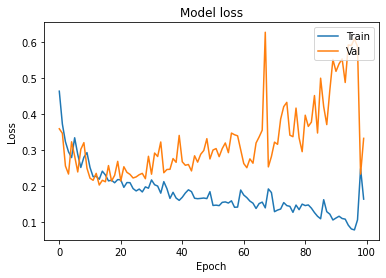

In [27]:
# visualizes model loss
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

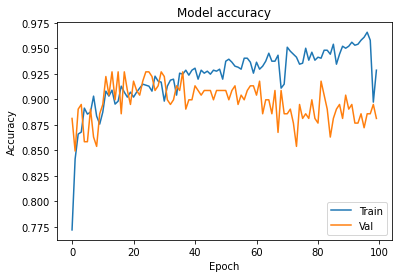

In [28]:
# visualizes model accuracy
plt.plot(hist_1.history['accuracy'])
plt.plot(hist_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### Training Regularized

In [29]:
from keras.layers import Dropout
from keras import regularizers

In [30]:
model_2 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [31]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
hist_2 = model_2.fit(x_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(x_val, y_val))

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 21.1192 - accuracy: 0.5596 - val_loss: 3.9223 - val_accuracy: 0.8447
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 2.5121 - accuracy: 0.8076 - val_loss: 0.5909 - val_accuracy: 0.8995
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6125 - accuracy: 0.8536 - val_loss: 0.4802 - val_accuracy: 0.8904
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4979 - accuracy: 0.8659 - val_loss: 0.5090 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4935 - accuracy: 0.8710 - val_loss: 0.4994 - val_accuracy: 0.8676
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4934 - accuracy: 0.8778 - val_loss: 0.4208 - val_accuracy: 0.9041
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4955 - accuracy: 0.8705 - val_loss: 0.4371 - val_accuracy: 0.8950
Epoch 8/100

### Testing Regularized

In [33]:
# Evaluates model performance (loss, accuracy)
model_2.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8904


[0.4076816439628601, 0.8904109597206116]

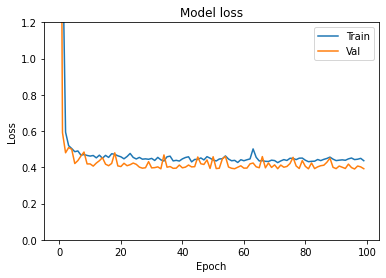

In [34]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

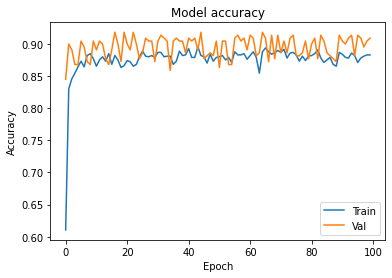

In [35]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()